In [ ]:
6. Object detection using Transfer Learning of CNN architectures
a. Load in a pre-trained CNN model trained on a large dataset
b. Freeze parameters (weights) in model’s lower convolutional layers
c. Add custom classifier with several layers of trainable parameters to model
d. Train classifier layers on training data available for task
e. Fine-tune hyper parameters and unfreeze more layers as needed

dataset: CIFAR

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [2]:
train_dir = "cifar-10-img/train"
test_dir = "cifar-10-img/test"

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

test_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

# here batch_size is the number of images in each batch
train_batch_size = 5000
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=train_batch_size,
    class_mode='categorical'
)
test_batch_size = 1000
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),
    batch_size=test_batch_size,
    class_mode='categorical'
)

Found 40079 images belonging to 10 classes.
Found 9921 images belonging to 10 classes.


In [3]:
x_train, y_train =  train_generator[0]
x_test, y_test = test_generator[0]

print(len(x_train))
print(len(x_test))

5000
1000


In [5]:
# Load VGG16 without top layers
weights_path = "vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(32, 32, 3))

In [6]:
for layer in base_model.layers:
   layer.trainable = False

In [7]:
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 241ms/step - accuracy: 0.3690 - loss: 1.8048 - val_accuracy: 0.4690 - val_loss: 1.5416
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 18s 231ms/step - accuracy: 0.4952 - loss: 1.4542 - val_accuracy: 0.5240 - val_loss: 1.4047
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 18s 233ms/step - accuracy: 0.5374 - loss: 1.3205 - val_accuracy: 0.5250 - val_loss: 1.3725
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 18s 232ms/step - accuracy: 0.5590 - loss: 1.2450 - val_accuracy: 0.5380 - val_loss: 1.3451
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 18s 227ms/step - accuracy: 0.5838 - loss: 1.1916 - val_accuracy: 0.5310 - val_loss: 1.3260
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 18s 231ms/step - accuracy: 0.6092 - loss: 1.1254 - val_accuracy: 0.5550 - val_loss: 1.2996
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 238ms/step - accuracy: 0.6304 - loss: 1.0754 - val_accuracy: 0.5400 - val_loss: 1.3088
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 18s 233ms/step - accuracy: 0.6412 - loss: 1.0399 - val_accu

In [9]:
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(32, 32, 3))
# freeze all layers first
for layer in base_model.layers:
   layer.trainable = False
# unfreeze last 4 layers of base model
for layer in base_model.layers[len(base_model.layers) - 4:]:
   layer.trainable = True
# fine-tuning hyper parameters
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# training fine tuned model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 45s 531ms/step - accuracy: 0.3212 - loss: 1.8395 - val_accuracy: 0.4810 - val_loss: 1.3799
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 40s 510ms/step - accuracy: 0.5770 - loss: 1.1761 - val_accuracy: 0.5760 - val_loss: 1.2633
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 514ms/step - accuracy: 0.6554 - loss: 0.9848 - val_accuracy: 0.5530 - val_loss: 1.2293
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 61s 769ms/step - accuracy: 0.7080 - loss: 0.8372 - val_accuracy: 0.6060 - val_loss: 1.1397
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 74s 930ms/step - accuracy: 0.7586 - loss: 0.6862 - val_accuracy: 0.6370 - val_loss: 1.1448
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 74s 934ms/step - accuracy: 0.8080 - loss: 0.5395 - val_accuracy: 0.6280 - val_loss: 1.2437
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 73s 923ms/step - accuracy: 0.8336 - loss: 0.4665 - val_accuracy: 0.6210 - val_loss: 1.3732
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 47s 588ms/step - accuracy: 0.8672 - loss: 0.3902 - val_accu

In [10]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step


In [11]:
labels = list(test_generator.class_indices.keys())

Preditcted:  airplane
Actual:  airplane


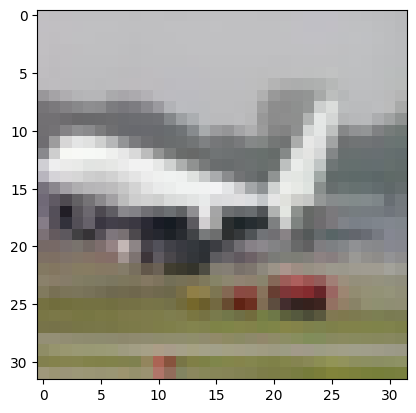

In [16]:
n = 756
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])